### Setup

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import os

In [5]:
os.chdir("/content/gdrive/My Drive/Shopify internship")

### Question answering:
a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
### Shops 42/78 have order amounts that deviate largely from the mean, causing the AOV to be skewed. A better way to calculate the AOV is to use a different measure of central tendency.
b) What metric would you report for this dataset?
### To calculate the AOV, I would use the median instead of the mean.
c) What is its value?
### The value is 284


### Preliminary analysis

In [6]:
data = pd.read_csv("shopify_data.csv")

In [7]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [109]:
data.describe()["order_amount"]
# Things to note
# 1 - Large std from the mean
# 2 - Majority of the orders (up to the 75 precentile) around much smaller than the max value
# 3 - The range is huge (max-min)

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [110]:
data.describe()["total_items"]
# Things to note
# 1 - Majority of the # of items ordered (up to the 75 precentile) around much smaller than the max value
# 2 - There is a correlation between the maximum amount of items ordered and maximum amount of order payment

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

### 2 Observations to be made
### 1: You have users that order in bulk (spending large amounts)
### 2: You have users purchasing a few items (that seem to be expensive)
### The calculated AOV maybe off because it doesn't account for the anomalies mentioned. 

In [27]:
# Shop with large order amounts
data[data["shop_id"] == 42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58


In [41]:
total_order_amount = sum(data[data["shop_id"]==42]["order_amount"].values)
total_orders = len(data[data["shop_id"]==42])
# Note the average order value of the shop
print("Average order of shop 42: " + str(round(total_order_amount/total_orders,2)) + "$")

Average order of shop 42: 235101.49$


In [42]:
# Shop with expensive orders
data[(data["shop_id"] == 78)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42


In [43]:
total_order_amount = sum(data[data["shop_id"]==78]["order_amount"].values)
total_orders = len(data[data["shop_id"]==78])
# Note the average order value of the shop
print("Average order of shop 78: " + str(round(total_order_amount/total_orders,2)) + "$")

Average order of shop 78: 49213.04$


### A naive way to calculate a better AOV is to exclude these anomalies (shop 42/78).

In [44]:
filtered_data = data[(data["shop_id"]!=42) & (data["shop_id"]!=78)]
total_order_amount = sum(filtered_data["order_amount"].values)
total_orders = len(filtered_data["order_id"].values)
print("Average order of filtered shops : " + str(round(total_order_amount/total_orders,2)) + "$")

Average order of filtered shops : 300.16$


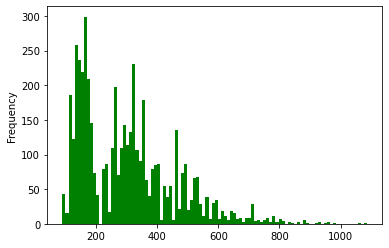

In [50]:
# The filtered dataframe can be used to visualize the data
filtered_data["order_amount"].plot(kind="hist",bins=100, color="g")

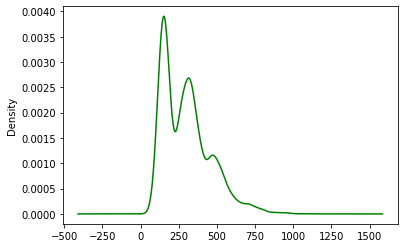

In [52]:
filtered_data["order_amount"].plot(kind="kde",color="g")

### A better way is to consider other measures of central tendency.

In [12]:
print("Mean value: " + str(data["order_amount"].mean()) + "$")

Mean value: 3145.128$


In [13]:
print("Median value: " + str(data["order_amount"].median()) + "$")

Median value: 284.0$


In [15]:
print("Mode value: " + str(data["order_amount"].mode()))

Mode value: 0    153
dtype: int64
